In [2]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x

In [2]:
from facenet_pytorch import InceptionResnetV1

In [3]:
model = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import shutil
shutil.copyfile("/content/drive/MyDrive/NN/hw4/Faces.zip", "/content/faces.zip")

'/content/faces.zip'

In [6]:
!unzip faces.zip

Archive:  faces.zip
   creating: Faces/
   creating: Faces/Alexandra Daddario/
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_0.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_1.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_10.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_11.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_12.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_13.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_14.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_15.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_16.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_17.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_18.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_19.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_2.jpg  
  inflating: Faces/Alexandra Daddario/Alexandra Daddario_20.jpg  


In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Path to the root directory containing the extracted dataset
data_dir = '/content/Faces'

# Define transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

# Create a PyTorch dataset from the ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Define the size of the training and testing subsets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset into training and testing subsets
train_set, test_set = random_split(dataset, [train_size, test_size])

# Create DataLoader objects to load data during training and testing
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [103]:
def label_mapping(label):
    if(label==0):
        return "Alexandra Daddario"
    elif(label==1):
        return "Andy Samberg"
    elif(label==2):
        return "Billie Eilish"
    elif(label==3):
        return "Brad Pitt"
    elif(label==4):
        return "Claire Holt"
    elif(label==5):
        return "Henry Cavill"
    elif(label==6):
        return "Hrithik Roshan"
    elif(label==7):
        return "Hugh Jackman"
    elif(label==8):
        return "Jessica Alba"
    elif(label==9):
        return "Natalie Portman"
    elif(label==10):
        return "Priyanka Chopra"
    elif(label==11):
        return "Robert Downey Jr"
    elif(label==12):
        return "Vijay Deverakonda"
    else:
        return "Zac Efron"

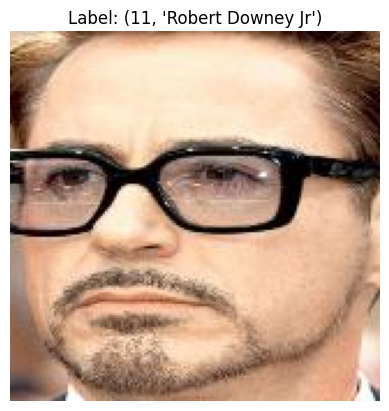

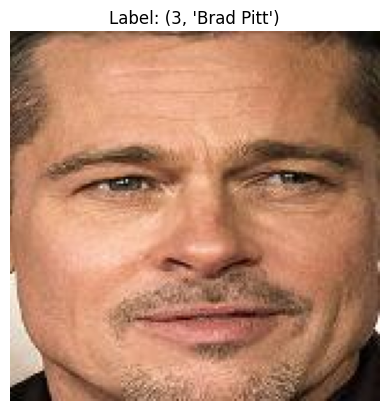

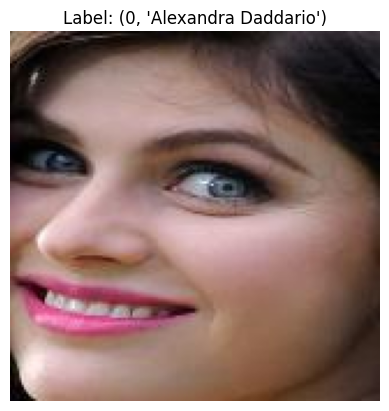

In [104]:
# Function to unnormalize and display an image with its label
def imshow_with_label(image, label):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Label: {label,label_mapping(label)}')
    plt.show()

# Get some random training samples
images, labels = next(iter(train_loader))

# Show each image separately with its label below it
for i in range(3):  # Show 3 images
    imshow_with_label(images[i], labels[i].item())

Epoch [1/10], Train Loss: 1.6332, Train Acc: 77.16%, Test Loss: 1.4951, Test Acc: 94.50%
Epoch [2/10], Train Loss: 0.3828, Train Acc: 97.84%, Test Loss: 0.3868, Test Acc: 98.63%
Epoch [3/10], Train Loss: 0.1118, Train Acc: 98.97%, Test Loss: 0.1470, Test Acc: 99.66%
Epoch [4/10], Train Loss: 0.1043, Train Acc: 99.48%, Test Loss: 0.1006, Test Acc: 99.66%
Epoch [5/10], Train Loss: 0.1172, Train Acc: 99.66%, Test Loss: 0.0829, Test Acc: 99.66%
Epoch [6/10], Train Loss: 0.0650, Train Acc: 99.83%, Test Loss: 0.0688, Test Acc: 99.66%
Epoch [7/10], Train Loss: 0.0144, Train Acc: 100.00%, Test Loss: 0.0576, Test Acc: 99.66%
Epoch [8/10], Train Loss: 0.0131, Train Acc: 100.00%, Test Loss: 0.0499, Test Acc: 99.66%
Epoch [9/10], Train Loss: 0.0156, Train Acc: 100.00%, Test Loss: 0.0462, Test Acc: 99.66%
Epoch [10/10], Train Loss: 0.0070, Train Acc: 100.00%, Test Loss: 0.0384, Test Acc: 99.66%


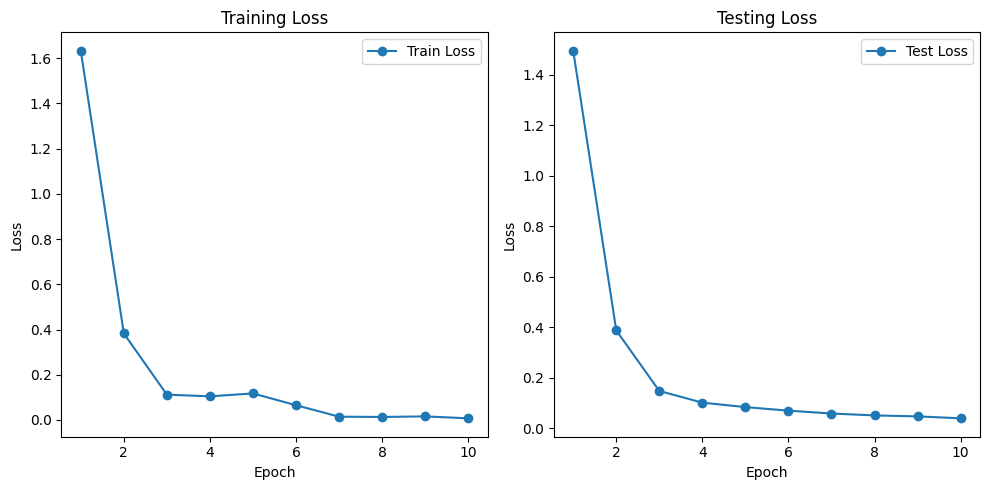

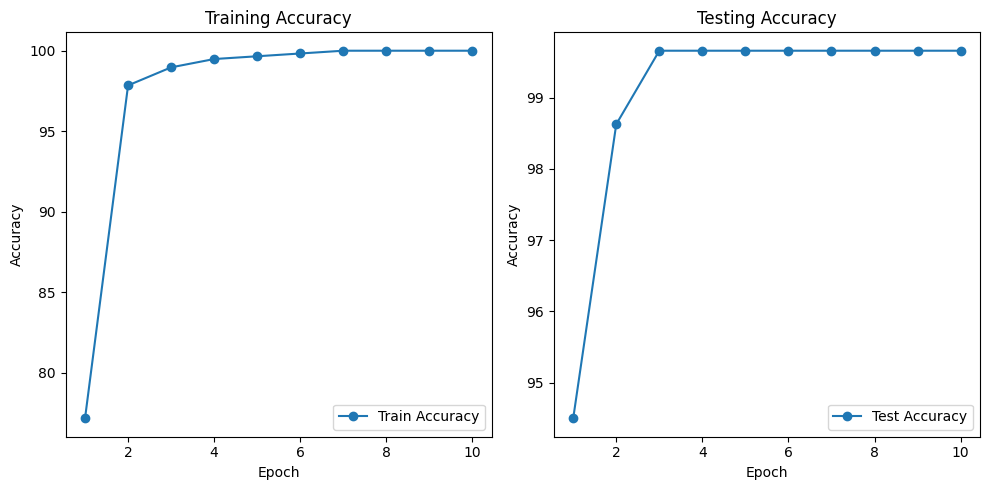

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1

# Define the architecture of the MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Get the dimensionality of the output embeddings from the InceptionResnetV1 model
embedding_size = 512

# Define the dimensionality of the hidden layer in the MLP
hidden_size = 256  # You can adjust this according to your requirements

# Define the output size (number of classes)
output_size = 14

# Create an instance of the MLP
mlp = MLP(embedding_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

# Lists to store training and testing accuracy and loss
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

t0 = time.time()

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Lists to store predictions and true labels for accuracy calculation
    train_predicted = []
    train_labels = []

    for images, labels in train_loader:
        # Forward pass through the model to obtain the embeddings
        with torch.no_grad():
            embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Compute the loss
        loss = criterion(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        train_predicted.extend(predicted.tolist())
        train_labels.extend(labels.tolist())

    # Compute training accuracy and loss
    train_accuracy = (sum([1 for pred, label in zip(train_predicted, train_labels) if pred == label]) / len(train_labels)) * 100
    train_loss = loss.item()
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    test_predicted = []
    test_labels = []

    for images, labels in test_loader:
        # Forward pass through the model to obtain the embeddings
        embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        test_predicted.extend(predicted.tolist())
        test_labels.extend(labels.tolist())

    # Compute testing accuracy and loss
    test_accuracy = (sum([1 for pred, label in zip(test_predicted, test_labels) if pred == label]) / len(test_labels)) * 100
    test_loss = criterion(output, labels).item()
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')

print("Training time:", time.time()-t0)

# Plotting the training and testing accuracy and loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Plot testing accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch [1/10], Train Loss: 1.7574, Train Acc: 78.02%, Test Loss: 1.5081, Test Acc: 97.94%
Epoch [2/10], Train Loss: 0.3188, Train Acc: 98.79%, Test Loss: 0.4404, Test Acc: 98.63%
Epoch [3/10], Train Loss: 0.0971, Train Acc: 99.22%, Test Loss: 0.2039, Test Acc: 98.97%
Epoch [4/10], Train Loss: 0.0562, Train Acc: 99.22%, Test Loss: 0.1297, Test Acc: 99.66%
Epoch [5/10], Train Loss: 0.0647, Train Acc: 99.40%, Test Loss: 0.1075, Test Acc: 99.66%
Epoch [6/10], Train Loss: 0.0401, Train Acc: 99.74%, Test Loss: 0.0802, Test Acc: 99.66%
Epoch [7/10], Train Loss: 0.1181, Train Acc: 100.00%, Test Loss: 0.0709, Test Acc: 99.66%
Epoch [8/10], Train Loss: 0.0145, Train Acc: 100.00%, Test Loss: 0.0687, Test Acc: 99.66%
Epoch [9/10], Train Loss: 0.0201, Train Acc: 100.00%, Test Loss: 0.0597, Test Acc: 99.66%
Epoch [10/10], Train Loss: 0.0164, Train Acc: 100.00%, Test Loss: 0.0527, Test Acc: 99.66%
Training time: 1174.989244222641


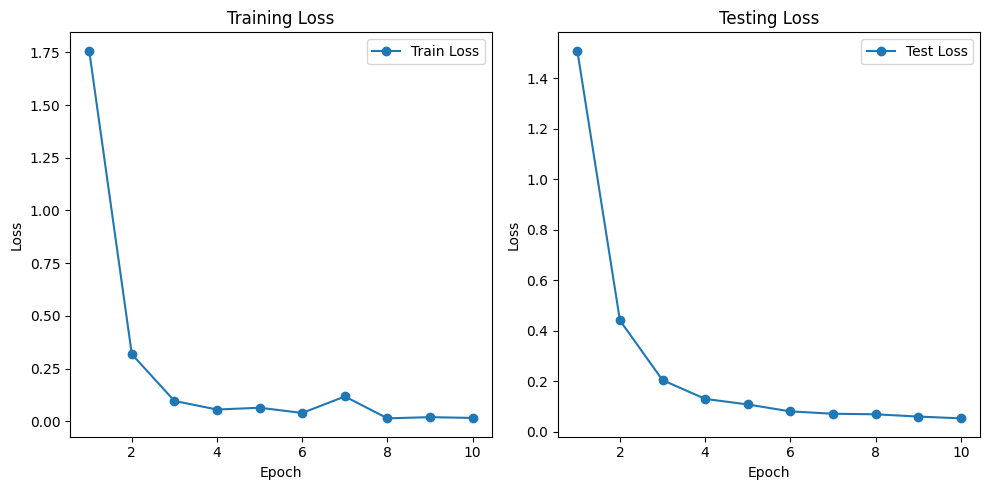

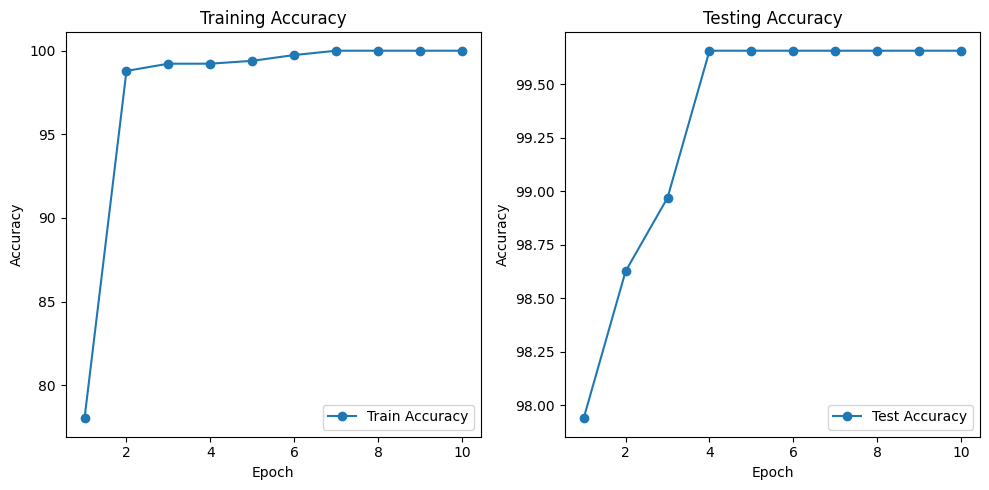

In [109]:
import time

# Define the architecture of the MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Get the dimensionality of the output embeddings from the InceptionResnetV1 model
embedding_size = 512

# Define the dimensionality of the hidden layer in the MLP
hidden_size = 256  # You can adjust this according to your requirements

# Define the output size (number of classes)
output_size = 14

# Create an instance of the MLP
mlp = MLP(embedding_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

# Lists to store training and testing accuracy and loss
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Define the layers to freeze in InceptionResnetV1
layers_to_freeze = ['conv2d_4a_3x3', 'conv2d_4b_3x3']

# Freeze the specified layers
for name, param in model.named_parameters():
    if any(layer_name in name for layer_name in layers_to_freeze):
        param.requires_grad = False

t0 = time.time()

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Lists to store predictions and true labels for accuracy calculation
    train_predicted = []
    train_labels = []

    for images, labels in train_loader:
        # Forward pass through the model to obtain the embeddings
        with torch.no_grad():
            embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Compute the loss
        loss = criterion(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        train_predicted.extend(predicted.tolist())
        train_labels.extend(labels.tolist())

    # Compute training accuracy and loss
    train_accuracy = (sum([1 for pred, label in zip(train_predicted, train_labels) if pred == label]) / len(train_labels)) * 100
    train_loss = loss.item()
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    test_predicted = []
    test_labels = []

    for images, labels in test_loader:
        # Forward pass through the model to obtain the embeddings
        embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        test_predicted.extend(predicted.tolist())
        test_labels.extend(labels.tolist())

    # Compute testing accuracy and loss
    test_accuracy = (sum([1 for pred, label in zip(test_predicted, test_labels) if pred == label]) / len(test_labels)) * 100
    test_loss = criterion(output, labels).item()
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')

print("Training time:", time.time()-t0)

# Plotting the training and testing accuracy and loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Plot testing accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch [1/5], Train Loss: 1.7083, Train Acc: 77.24%, Test Loss: 1.6328, Test Acc: 98.28%
Epoch [2/5], Train Loss: 0.4777, Train Acc: 98.62%, Test Loss: 0.4461, Test Acc: 98.97%
Epoch [3/5], Train Loss: 0.1224, Train Acc: 98.97%, Test Loss: 0.1865, Test Acc: 98.97%
Epoch [4/5], Train Loss: 0.0383, Train Acc: 99.22%, Test Loss: 0.1156, Test Acc: 99.66%
Epoch [5/5], Train Loss: 0.0482, Train Acc: 99.48%, Test Loss: 0.0920, Test Acc: 99.31%
Training time: 578.9159491062164


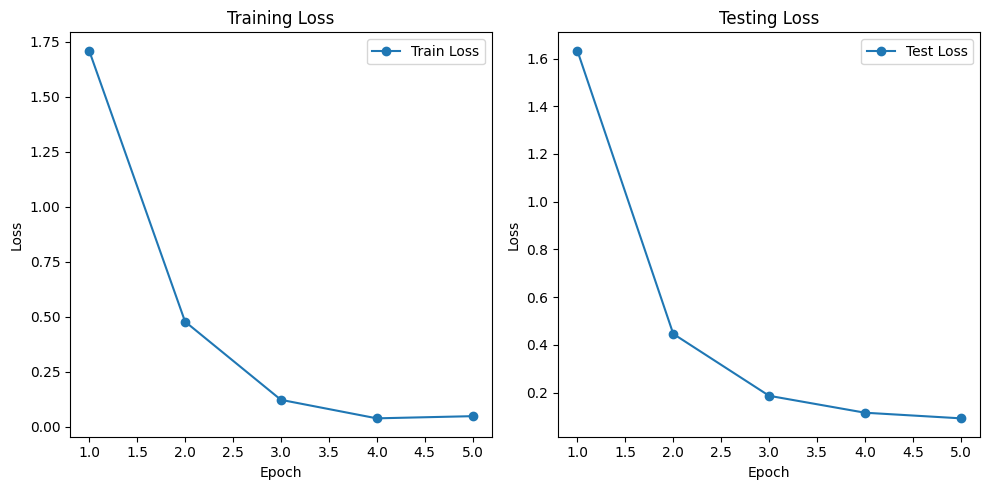

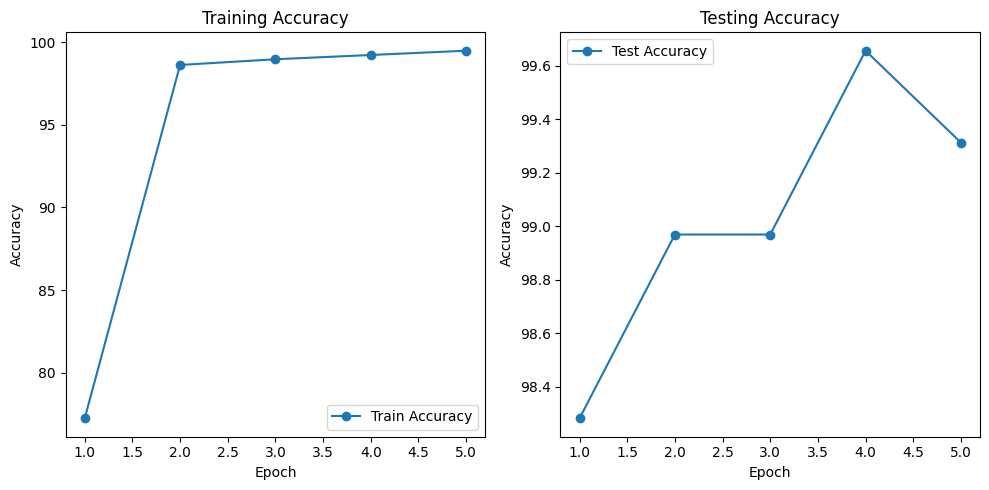

In [111]:
import time

# Define the architecture of the MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Get the dimensionality of the output embeddings from the InceptionResnetV1 model
embedding_size = 512

# Define the dimensionality of the hidden layer in the MLP
hidden_size = 256  # You can adjust this according to your requirements

# Define the output size (number of classes)
output_size = 14

# Create an instance of the MLP
mlp = MLP(embedding_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

# Lists to store training and testing accuracy and loss
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Define the layers to freeze in InceptionResnetV1
layers_to_freeze = ['conv2d_4a_3x3', 'conv2d_4b_3x3','conv2d_3b_3x3','conv2d_3a_3x3']

# Freeze the specified layers
for name, param in model.named_parameters():
    if any(layer_name in name for layer_name in layers_to_freeze):
        param.requires_grad = False

t0 = time.time()

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    # Lists to store predictions and true labels for accuracy calculation
    train_predicted = []
    train_labels = []

    for images, labels in train_loader:
        # Forward pass through the model to obtain the embeddings
        with torch.no_grad():
            embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Compute the loss
        loss = criterion(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        train_predicted.extend(predicted.tolist())
        train_labels.extend(labels.tolist())

    # Compute training accuracy and loss
    train_accuracy = (sum([1 for pred, label in zip(train_predicted, train_labels) if pred == label]) / len(train_labels)) * 100
    train_loss = loss.item()
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    test_predicted = []
    test_labels = []

    for images, labels in test_loader:
        # Forward pass through the model to obtain the embeddings
        embeddings = model(images)

        # Forward pass through the MLP to obtain the final output
        output = mlp(embeddings)

        # Store predictions and true labels for accuracy calculation
        _, predicted = torch.max(output.data, 1)
        test_predicted.extend(predicted.tolist())
        test_labels.extend(labels.tolist())

    # Compute testing accuracy and loss
    test_accuracy = (sum([1 for pred, label in zip(test_predicted, test_labels) if pred == label]) / len(test_labels)) * 100
    test_loss = criterion(output, labels).item()
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')

print("Training time:", time.time()-t0)

# Plotting the training and testing accuracy and loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Plot testing accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

In [105]:
# Lists to store test embeddings
test_embeddings = []
test_labels = []
test_images = []

# Extract embeddings for the test images
with torch.no_grad():
    for images, labels in test_loader:
        embeddings = model(images)
        test_embeddings.append(embeddings)
        test_labels.append(labels)
        test_images.append(images)

# Concatenate the test embeddings into a single tensor
test_embeddings = torch.cat(test_embeddings)
test_labels = torch.cat(test_labels)
test_images = torch.cat(test_images)

In [56]:
test_labels[:28]

tensor([ 7,  3,  7, 10,  4,  7,  9, 12,  1, 11,  7,  3,  8, 11,  0, 11, 10,  8,
         3,  5, 13, 12,  7,  6, 11,  0,  7,  2])

In [113]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    similarity = F.cosine_similarity(embedding1, embedding2).item()

    # Set a threshold for similarity
    threshold = 0.9

    # Determine if the images belong to the same person based on the similarity
    if similarity >= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.9586206896551724


In [114]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    similarity = F.cosine_similarity(embedding1, embedding2).item()

    # Set a threshold for similarity
    threshold = 0.3

    # Determine if the images belong to the same person based on the similarity
    if similarity >= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.9206896551724137


In [115]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    similarity = F.cosine_similarity(embedding1, embedding2).item()

    # Set a threshold for similarity
    threshold = 0.6

    # Determine if the images belong to the same person based on the similarity
    if similarity >= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.9793103448275862


In [116]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    distance = torch.norm(embedding1 - embedding2, p=2).item()

    # Set a threshold for similarity
    threshold = 1.5

    # Determine if the images belong to the same person based on the similarity
    if distance <= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.1103448275862069


In [117]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    distance = torch.norm(embedding1 - embedding2, p=2).item()

    # Set a threshold for similarity
    threshold = 0.4

    # Determine if the images belong to the same person based on the similarity
    if distance <= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.9586206896551724


In [118]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    distance = torch.norm(embedding1 - embedding2, p=2).item()

    # Set a threshold for similarity
    threshold = 1.0

    # Determine if the images belong to the same person based on the similarity
    if distance <= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.9793103448275862


In [119]:
count = 0
for i in range(len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    embedding2 = test_embeddings[i+1].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
    distance = torch.norm(embedding1 - embedding2, p=2).item()

    # Set a threshold for similarity
    threshold = 1.05

    # Determine if the images belong to the same person based on the similarity
    if distance <= threshold:
        # print("The images belong to the same person.")
        if(test_labels[i]==test_labels[i+1]):
            count+=1
    else:
        # print("The images belong to different persons.")
        if(test_labels[i]!=test_labels[i+1]):
            count+=1

print(count/(len(test_embeddings)-1))

0.9827586206896551


13  belongs to  13


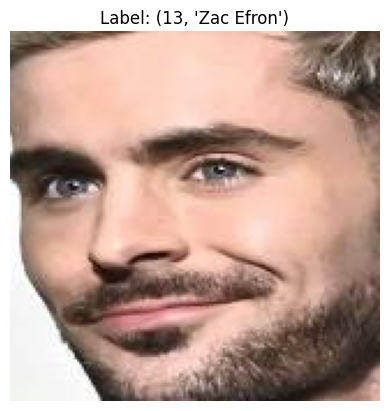

Zac Efron
8  belongs to  8


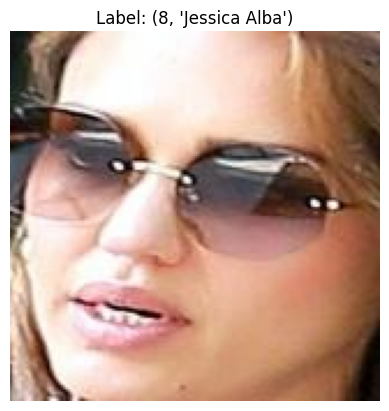

Jessica Alba
4  belongs to  4


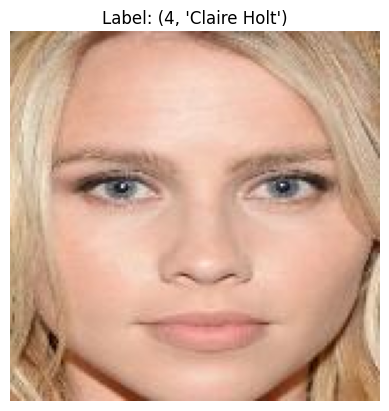

Claire Holt
6  belongs to  12


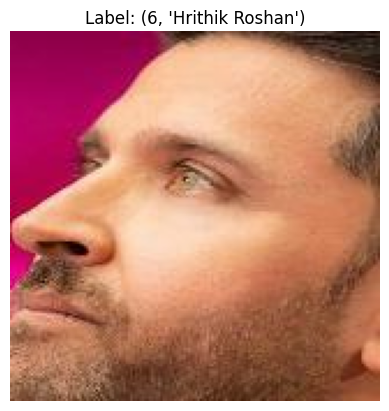

Vijay Deverakonda
6  belongs to  6
12  belongs to  12
6  belongs to  3
5  belongs to  5
11  belongs to  11
0  belongs to  0
3  belongs to  3
0  belongs to  0
12  belongs to  12
3  belongs to  3
5  belongs to  5
8  belongs to  8
4  belongs to  0
5  belongs to  5
5  belongs to  6
10  belongs to  10
9  belongs to  9
2  belongs to  2
8  belongs to  8
10  belongs to  10
8  belongs to  8
2  belongs to  2
12  belongs to  12
8  belongs to  8
7  belongs to  7
8  belongs to  8
1  belongs to  1
7  belongs to  7
6  belongs to  6
0  belongs to  0
8  belongs to  8
3  belongs to  3
1  belongs to  1
6  belongs to  6
13  belongs to  13
10  belongs to  10
13  belongs to  13
6  belongs to  6
5  belongs to  5
10  belongs to  10
12  belongs to  12
1  belongs to  3
8  belongs to  8
0  belongs to  0
8  belongs to  8
5  belongs to  5
12  belongs to  12
3  belongs to  3
7  belongs to  7
6  belongs to  12
3  belongs to  3
12  belongs to  12
9  belongs to  9
6  belongs to  3
0  belongs to  0
6  belongs to  12
2 

In [108]:
min_dis = 1.5
l = ""
for i in range(28,len(test_embeddings)-1):
    # Get embeddings for the two test images
    embedding1 = test_embeddings[i].unsqueeze(0)  # Assuming the first image is the first test image
    for j in range(28):
        embedding2 = test_embeddings[j].unsqueeze(0)  # Assuming the second image is the second test image

    # Compute cosine similarity between the embeddings
        distance = torch.norm(embedding1 - embedding2, p=2).item()

        if(distance<min_dis):
            min_dis = distance
            l = test_labels[j]
    if(distance>1.7):
        print(test_labels[i].item()," belongs to nothing")
    else:
        print(test_labels[i].item()," belongs to ", l.item())
    min_dis = 1.5

    if(i<32):
        imshow_with_label(test_images[i],test_labels[i].item())
        print(label_mapping(l.item()))
